In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

plt.ion()
%matplotlib widget

In [83]:
separation_list = [25, 50, 100, 125, 150, 175, 200]
pulse_power = [136, 237, 395, 456, 517, 568, 600]

In [66]:
def plot_RI_RO(separation):

    # Read csv files

    signal_only = np.genfromtxt(f'Data/18072024_S{separation}_1.5.csv', delimiter=',', skip_header=2)
    background = np.genfromtxt(f'Data/18072024_B{separation}_1.5.csv', delimiter=',', skip_header=2)
    ORCA_RI = np.genfromtxt(f'Data/18072024_O{separation}_1.5_RI.csv', delimiter=',', skip_header=2)
    ORCA_RO = np.genfromtxt(f'Data/18072024_O{separation}_1.5_RO.csv', delimiter=',', skip_header=2)


    # Extract data

    signal_only_time = signal_only[:,0]
    signal_only_volt = signal_only[:,1]

    background_time = background[:,0]
    background_volt = background[:,1]

    ORCA_RI_time = ORCA_RI[:,0]
    ORCA_RI_volt = ORCA_RI[:,1]

    ORCA_RO_time = ORCA_RO[:,0]
    ORCA_RO_volt = ORCA_RO[:,1]

    # Subtract background

    signal_only_volt = signal_only_volt - background_volt
    ORCA_RI_volt = ORCA_RI_volt - background_volt
    ORCA_RO_volt = ORCA_RO_volt - background_volt

    signal_only_time = signal_only_time - signal_only_time[0]
    ORCA_RI_time = ORCA_RI_time - ORCA_RI_time[0]
    ORCA_RO_time = ORCA_RO_time - ORCA_RO_time[0]

    peaks, _ = find_peaks(signal_only_volt, distance=180, prominence=0.0001)
    signal_only_max = np.mean(signal_only_volt[peaks])

    signal_only_volt_norm = signal_only_volt / signal_only_max
    ORCA_RI_volt_norm = ORCA_RI_volt / signal_only_max
    ORCA_RO_volt_norm = ORCA_RO_volt / signal_only_max

    # Zoom to RI/RO region
    signal_only_volt_norm = signal_only_volt_norm[np.logical_and(signal_only_time > 2.2e-8, signal_only_time < 2.8e-8)]
    signal_only_time = signal_only_time[np.logical_and(signal_only_time > 2.2e-8, signal_only_time < 2.8e-8)]

    ORCA_RI_volt_norm = ORCA_RI_volt_norm[np.logical_and(ORCA_RI_time > 2.2e-8, ORCA_RI_time < 2.8e-8)]
    ORCA_RI_time = ORCA_RI_time[np.logical_and(ORCA_RI_time > 2.2e-8, ORCA_RI_time < 2.8e-8)]

    ORCA_RO_volt_norm = ORCA_RO_volt_norm[np.logical_and(ORCA_RO_time > 2.2e-8, ORCA_RO_time < 2.8e-8)]
    ORCA_RO_time = ORCA_RO_time[np.logical_and(ORCA_RO_time > 2.2e-8, ORCA_RO_time < 2.8e-8)]

    peaks_RI, _ = find_peaks(ORCA_RI_volt_norm, distance=5, prominence=0.01)
    peaks_RO, _ = find_peaks(ORCA_RO_volt_norm, distance=5, prominence=0.01)
    peak_signal = np.where(signal_only_volt_norm == max(signal_only_volt_norm))


    RI_peak = np.where(ORCA_RI_volt_norm == max(ORCA_RI_volt_norm[peaks_RI]))
    max_readin_eff = max(signal_only_volt_norm)-ORCA_RI_volt_norm[RI_peak]

    RO_peak = np.where(ORCA_RO_volt_norm == min(ORCA_RO_volt_norm[peaks_RO[peaks_RO >= peak_signal[0][0]]]))
    max_readout_eff = ORCA_RO_volt_norm[RO_peak]

    print(f'Max readin efficiency: {max_readin_eff}')
    print(f'Max readout efficiency: {max_readout_eff}')
    # Plot
    # plt.figure()
    # plt.plot(signal_only_time, signal_only_volt, label='Signal only')
    # plt.plot(ORCA_RI_time, ORCA_RI_volt, label='ORCA RI')
    # plt.plot(ORCA_RO_time, ORCA_RO_volt, label='ORCA RO')
    # plt.plot(signal_only_time[peaks], signal_only_volt[peaks], 'x')
    # plt.xlabel('Time (s)')
    # plt.ylabel('Voltage (V)')
    # # plt.xlim(2.3e-8, 2.8e-8)
    # plt.legend(loc='upper right')
    # plt.show()

    plt.figure()
    plt.plot(signal_only_time, signal_only_volt_norm, label='Signal only')
    plt.plot(ORCA_RI_time, ORCA_RI_volt_norm, label='ORCA RI')
    plt.plot(ORCA_RO_time, ORCA_RO_volt_norm, label='ORCA RO')
    # plt.plot(ORCA_RI_time[RI_peak], ORCA_RI_volt_norm[RI_peak], 'x', color='red')
    # plt.plot(ORCA_RO_time[RO_peak], ORCA_RO_volt_norm[RO_peak], 'x', color='blue')
    # plt.plot(signal_only_time[peak_signal], signal_only_volt_norm[peak_signal], 'x', color='green')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.legend()
    plt.title(f'RI/RO for separation: {separation} ns, pulse power {pulse_power[separation_list.index(separation)]} pJ')
    plt.show()

    plt.savefig(f'RI_RO_{separation}_1.5ns_sep.png')


Max readin efficiency: [0.82955414]
Max readout efficiency: [0.05491538]


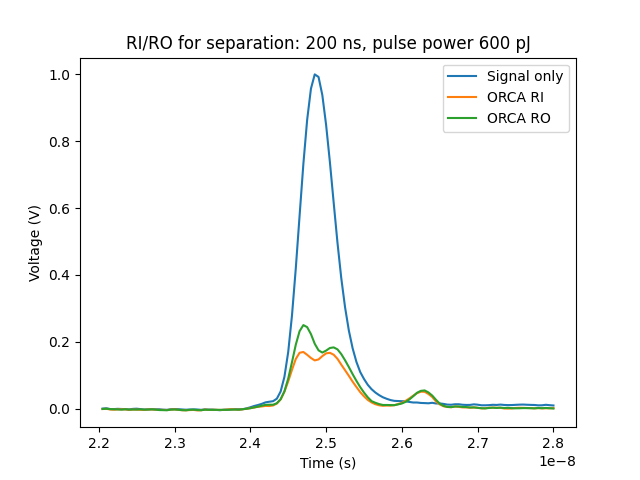

In [95]:
plot_RI_RO(200)

In [78]:
RO_max_RO_list = np.array([0.09, 0.064, 0.03, 0.07, 0.056, 0.061, 0.055])
RO_max_RI_list = np.array([1-0.32, 1-0.4, 1-0.28, 1-0.27, 1-0.2, 1-0.38, 1-0.25])
RI_max_RO_list = np.array([0.073, 0.04, 0.027, 0.045, 0.052, 0.0638, 0.051])
RI_max_RI_list = np.array([1-0.18, 1-0.12, 1-0.095, 1-0.11, 1- 0.12, 1-0.24, 1-0.16])

RO_max_RO_list = RO_max_RO_list/RO_max_RI_list
RI_max_RO_list = RI_max_RO_list/RI_max_RI_list


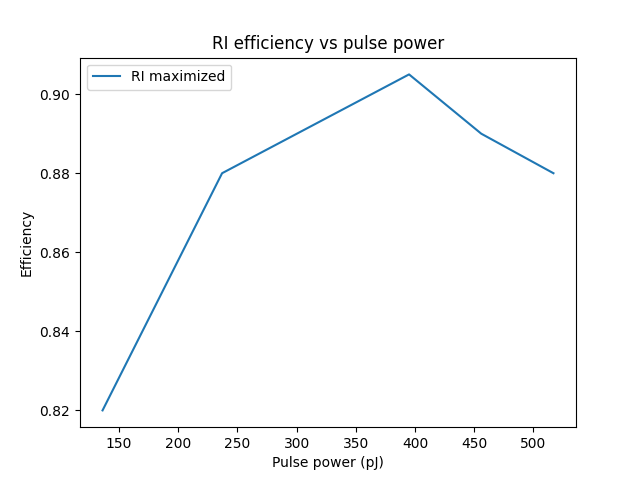

In [97]:
# Plot RI efficiency vs pulse power
plt.figure()
# plt.plot(pulse_power, RO_max_RI_list, label='RO maximized')
plt.plot(pulse_power[:-2], RI_max_RI_list[:-2], label='RI maximized')
plt.xlabel('Pulse power (pJ)')
plt.ylabel('Efficiency')
plt.legend()
plt.title('RI efficiency vs pulse power')
plt.show()


In [80]:
RI_max_RI_list 

array([0.82 , 0.88 , 0.905, 0.89 , 0.88 , 0.76 , 0.84 ])

In [51]:
min(ORCA_RO_volt_norm[peaks_RO[peaks_RO >= peak_signal[0][0]]])

0.06389834026774537

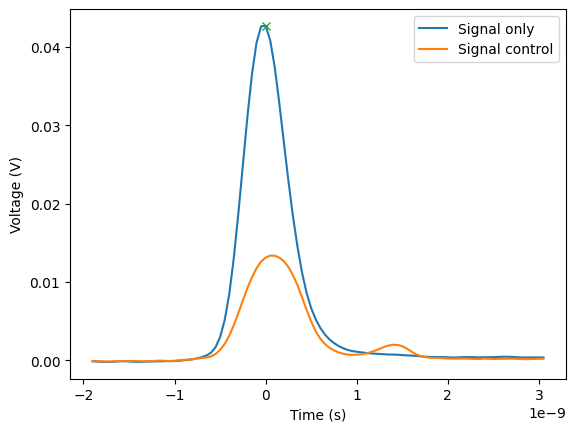

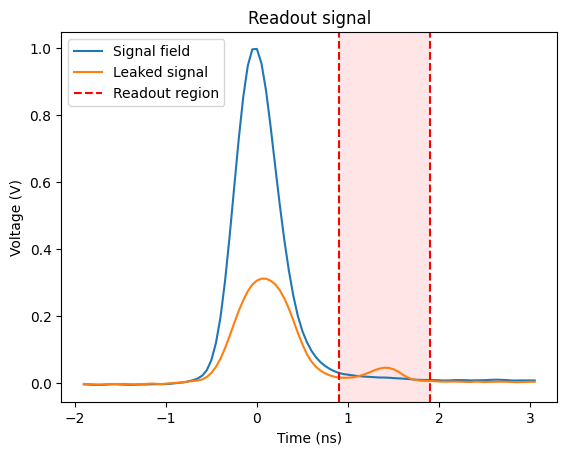

In [71]:
ROI = [2.3e-8, 2.8e-8]
ROI_idx = np.where((signal_only_time >= ROI[0]) & (signal_only_time <= ROI[1]))[0]

signal_only_volt_ROI = signal_only_volt[ROI_idx]
signal_control_volt_ROI = signal_control_volt[ROI_idx]

signal_only_volt_ROI_norm = signal_only_volt_ROI / signal_only_max
signal_control_volt_ROI_norm = signal_control_volt_ROI / signal_only_max

time_signal_only = signal_only_time[ROI_idx] - signal_only_time[ROI_idx][0]
time_signal_control = signal_control_time[ROI_idx] - signal_control_time[ROI_idx][0]

peak, _ = find_peaks(signal_only_volt_ROI, distance=180, prominence=0.0001)
peak_norm, _ = find_peaks(signal_only_volt_ROI_norm, distance=180, prominence=0.0001)

time_peak = time_signal_only[peak]
time_peak_norm = time_signal_only[peak_norm]

time_singal_only_centralised = time_signal_only - time_peak
time_singal_only_centralised_norm = time_signal_only - time_peak_norm


plt.plot(time_singal_only_centralised, signal_only_volt_ROI, label='Signal only')
plt.plot(time_singal_only_centralised, signal_control_volt_ROI, label='Signal control')
plt.plot(time_singal_only_centralised[peak], signal_only_volt_ROI[peak], 'x')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()

plt.plot(time_singal_only_centralised_norm*1e9, signal_only_volt_ROI_norm, label='Signal field')
plt.plot(time_singal_only_centralised_norm*1e9, signal_control_volt_ROI_norm, label='Leaked signal')
# plt.plot(time_singal_only_centralised_norm[peak_norm], signal_only_volt_ROI_norm[peak_norm], 'x')
plt.axvline(x=0.9, color='r', linestyle='--', label='Readout region')
plt.axvline(x=1.9, color='r', linestyle='--')
plt.axvspan(0.9, 1.9, color='r', alpha=0.1, lw=0)
plt.xlabel('Time (ns)')
plt.ylabel('Voltage (V)')
plt.title('Readout signal')
plt.legend()
plt.show()